### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

### Load Data and Initial Exploration

In [3]:
# Define the column names based on the project's README
base_columns = [
    'LC101', 'PC101', 'TC101', 'LC201', 'PC201', 'TC201', 
    'FC101', 'FC102', 'FC201', 'FC202', 'FC203', 'FC204', 'FC205'
]

# Create the full list of column names
columns_t = [f'{col}_t' for col in base_columns]
columns_t_minus_1 = [f'{col}_t-1' for col in base_columns]
final_columns = columns_t + columns_t_minus_1 + ['Class']

# Load the training data, but skip the first row which contains text headers
try:
    train_df = pd.read_csv(
        'data/SWTU_FDD_standardized_train_data.txt', 
        sep='\s+', 
        header=None, 
        names=final_columns,
        skiprows=1  # <-- This is the important new line
    )
    print("Successfully loaded the training data and skipped the header row.")
    
    # Now, let's explicitly convert all columns (except the last one) to numeric
    for col in train_df.columns[:-1]:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    
    # And convert the 'Class' column to integer
    train_df['Class'] = train_df['Class'].astype(int)

    print("\nData types have been corrected.")

except FileNotFoundError:
    print("Error: The file 'data/SWTU_FDD_standardized_train_data.txt' was not found.")
    train_df = pd.DataFrame() 

if not train_df.empty:
    print("\nFirst 5 rows of the corrected data:")
    display(train_df.head())

    print("\nDataframe Info (Corrected):")
    train_df.info()

    print("\nSummary Statistics (Corrected):")
    display(train_df.describe())

Successfully loaded the training data and skipped the header row.

Data types have been corrected.

First 5 rows of the corrected data:


,LC101_t,PC101_t,TC101_t,LC201_t,PC201_t,TC201_t,FC101_t,FC102_t,FC201_t,FC202_t,...,PC201_t-1,TC201_t-1,FC101_t-1,FC102_t-1,FC201_t-1,FC202_t-1,FC203_t-1,FC204_t-1,FC205_t-1,Class
0,-0.226945,-0.050866,0.365935,-0.425807,0.351257,0.253889,0.473515,-0.178666,-0.220239,0.318906,...,0.337129,0.121835,0.635312,-0.505131,-0.206179,0.303541,0.575244,-1.468123,-0.585771,0
1,-0.018427,0.222463,-0.146951,-0.318021,0.304929,0.255149,0.236263,-0.124969,0.091781,0.334109,...,0.308592,0.193964,0.001577,-0.393302,-0.006578,0.357883,1.395208,0.584187,-0.184807,0
2,-0.332779,0.314437,0.663118,-0.468509,0.322963,0.146278,-0.686420,-0.394582,-0.021115,0.301382,...,0.319638,-0.316132,0.117758,-0.350669,-0.044660,0.281388,-2.196324,-0.842466,0.088895,0
3,0.517257,0.199488,-0.829072,-0.119851,0.310392,0.457336,-0.368316,-1.553809,-1.212390,0.160877,...,0.302984,0.107819,-0.388549,-1.754907,-1.163755,0.175769,-2.504184,-0.097501,0.710024,0
4,-0.482781,0.082493,1.275475,0.188777,0.307159,-2.333918,-0.381330,-0.315983,2.892612,0.338065,...,0.306605,-2.378418,0.316540,-0.282637,2.762992,0.295970,0.135580,0.777817,-0.465383,1



Dataframe Info (Corrected):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37519 entries, 0 to 37518
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LC101_t    37519 non-null  float64
 1   PC101_t    37519 non-null  float64
 2   TC101_t    37519 non-null  float64
 3   LC201_t    37519 non-null  float64
 4   PC201_t    37519 non-null  float64
 5   TC201_t    37519 non-null  float64
 6   FC101_t    37519 non-null  float64
 7   FC102_t    37519 non-null  float64
 8   FC201_t    37519 non-null  float64
 9   FC202_t    37519 non-null  float64
 10  FC203_t    37519 non-null  float64
 11  FC204_t    37519 non-null  float64
 12  FC205_t    37519 non-null  float64
 13  LC101_t-1  37519 non-null  float64
 14  PC101_t-1  37519 non-null  float64
 15  TC101_t-1  37519 non-null  float64
 16  LC201_t-1  37519 non-null  float64
 17  PC201_t-1  37519 non-null  float64
 18  TC201_t-1  37519 non-null  float64
 19  FC101_t-1  37519 

,LC101_t,PC101_t,TC101_t,LC201_t,PC201_t,TC201_t,FC101_t,FC102_t,FC201_t,FC202_t,...,PC201_t-1,TC201_t-1,FC101_t-1,FC102_t-1,FC201_t-1,FC202_t-1,FC203_t-1,FC204_t-1,FC205_t-1,Class
count,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,...,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,3.751900e+04,37519.000000
mean,-3.231828e-13,-1.768189e-13,5.203215e-12,-1.042452e-12,-2.791293e-14,1.952661e-12,-1.905242e-12,-3.671419e-13,3.060218e-13,-2.413789e-14,...,9.723540e-15,8.951123e-13,-3.021323e-12,-2.618189e-13,2.609863e-13,-8.089097e-14,1.953045e-12,-2.947330e-12,1.372217e-12,1.167595
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.743341
min,-1.364585e+00,-6.137864e+00,-4.822582e+00,-3.285299e+00,-3.654991e+00,-5.169456e+00,-5.774502e+00,-4.124140e+00,-3.609384e+00,-5.581854e+00,...,-3.663573e+00,-5.156943e+00,-5.770441e+00,-4.215662e+00,-3.605506e+00,-5.575345e+00,-3.986923e+00,-8.675204e+00,-1.096304e+02,0.000000
25%,-4.756425e-01,-4.016541e-01,-6.537036e-01,-4.930516e-01,2.677062e-01,-2.828321e-01,-5.355558e-01,-4.891358e-01,-1.391959e-01,2.883725e-01,...,2.680828e-01,-2.825627e-01,-5.354908e-01,-4.891619e-01,-1.390447e-01,2.887002e-01,-1.136648e-01,-6.745210e-01,-2.698602e-01,0.000000
50%,-2.724988e-01,-5.451790e-02,6.835468e-04,-2.136954e-01,3.085588e-01,3.977963e-02,-5.451963e-02,-2.848727e-01,-4.846799e-03,3.139593e-01,...,3.089596e-01,3.949000e-02,-5.463958e-02,-2.847547e-01,-4.755087e-03,3.143176e-01,1.372980e-01,8.622452e-04,7.215653e-02,0.000000
75%,-2.882926e-02,2.906851e-01,6.541486e-01,1.060328e-01,3.201215e-01,3.301474e-01,4.524762e-01,5.559200e-01,1.195318e-01,3.289713e-01,...,3.205257e-01,3.291906e-01,4.522118e-01,5.574939e-01,1.196402e-01,3.293230e-01,4.114649e-01,6.746817e-01,4.090795e-01,2.000000
max,4.967659e+00,4.087816e+01,5.428549e+00,4.344658e+00,1.000705e+00,1.021913e+01,8.413836e+00,3.825954e+00,3.115358e+00,5.595122e-01,...,1.000148e+00,1.019394e+01,8.407868e+00,3.824146e+00,3.112237e+00,5.596275e-01,2.222941e+00,4.322985e+00,4.179759e+00,6.000000


### Exploratory Data Analysis (EDA) - Class Distribution

Created 'images' directory to save plots.


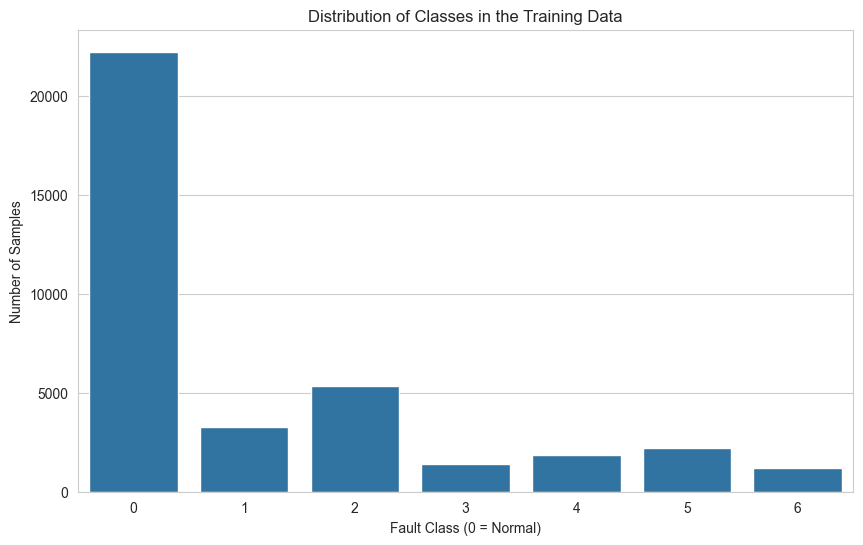


Class distribution counts:
Class
0    22245
1     3262
2     5348
3     1392
4     1875
5     2209
6     1188
Name: count, dtype: int64


In [5]:
import os

# --- Create a directory for images ---
if not os.path.exists('images'):
    os.makedirs('images')
    print("Created 'images' directory to save plots.")

# --- Generate the plot ---
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=train_df)
plt.title('Distribution of Classes in the Training Data')
plt.xlabel('Fault Class (0 = Normal)')
plt.ylabel('Number of Samples')

# --- Save the plot to a file ---
# This line saves the figure before it is shown.
plt.savefig('images/class_distribution.png', dpi=300) # dpi=300 for high quality

# --- Display the plot in the notebook ---
plt.show()

# --- Print the exact counts ---
print("\nClass distribution counts:")
print(train_df['Class'].value_counts().sort_index())

### Correlation Analysis

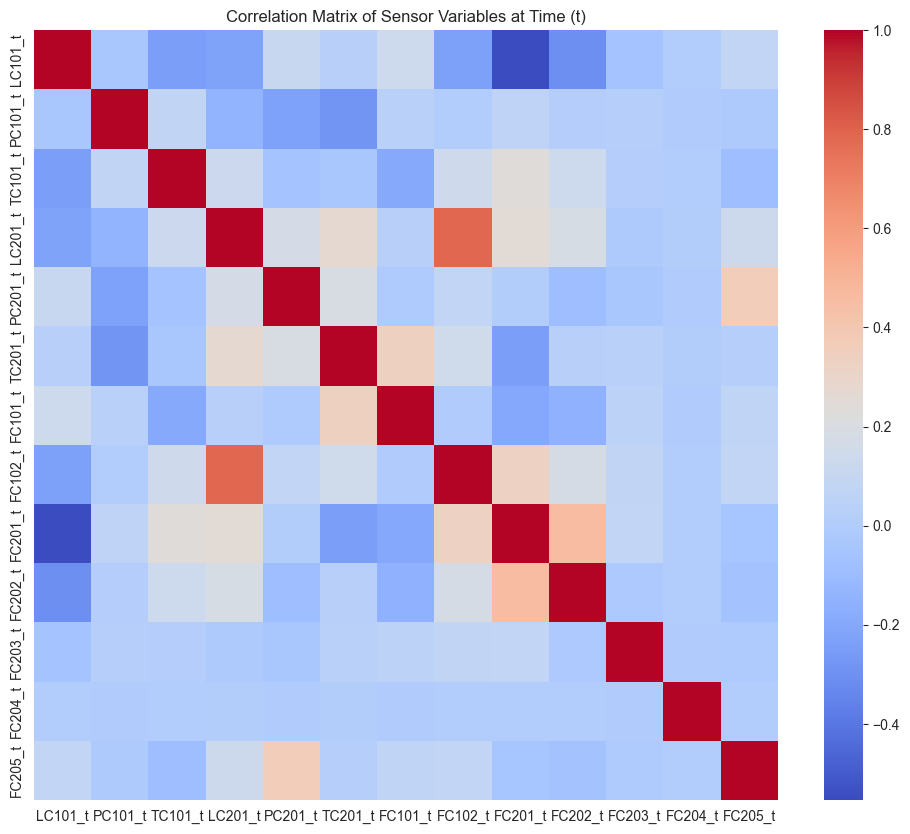

In [6]:
# We will only look at the sensor readings from the current timestep (t) for clarity
columns_t = [col for col in train_df.columns if col.endswith('_t')]
correlation_matrix = train_df[columns_t].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Sensor Variables at Time (t)')
plt.savefig('images/correlation_heatmap.png', dpi=300)
plt.show()

### Build a Baseline Model

 #### Baseline Model Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Prepare Data ---
# Separate features (X) from the target variable (y)
X = train_df.drop('Class', axis=1)
y = train_df['Class']

# --- 2. Split Data into Training and Validation Sets ---
# We use 'stratify=y' because our classes are imbalanced. 
# This ensures the train and validation sets have the same proportion of each class.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for validation, 80% for training
    random_state=42,  # for reproducibility
    stratify=y
)

print("Data split successfully.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

# --- 3. Train the Baseline RandomForest Model ---
print("\nTraining the baseline RandomForest model...")
# We use class_weight='balanced' to help the model pay more attention to the minority classes.
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
baseline_model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Evaluate the Baseline Model ---
print("\nEvaluating the baseline model on the validation set...")
y_pred = baseline_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\nBaseline Model Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
# This is the most important output for an imbalanced dataset!
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Data split successfully.
Training set shape: (30015, 26)
Validation set shape: (7504, 26)

Training the baseline RandomForest model...
Model training complete.

Evaluating the baseline model on the validation set...

Baseline Model Accuracy: 95.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4449
           1       0.95      0.87      0.90       652
           2       0.99      0.91      0.95      1070
           3       1.00      0.91      0.95       278
           4       0.99      0.99      0.99       375
           5       1.00      0.99      1.00       442
           6       0.99      0.83      0.90       238

    accuracy                           0.96      7504
   macro avg       0.98      0.93      0.95      7504
weighted avg       0.96      0.96      0.96      7504



### Hyperparameter Tuning

####  Hyperparameter Tuning with RandomizedSearchCV

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the RandomizedSearchCV
# We're searching for the combination that gives the best F1-score (macro average)
# n_iter=50 means it will try 50 different random combinations of parameters.
# cv=3 means it will use 3-fold cross-validation for each combination.
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2, # This will print progress
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro' # Focus on the macro F1-score due to imbalance
)

print("Starting hyperparameter tuning...")
# This step will take some time to run
random_search.fit(X_train, y_train)
print("\nTuning complete.")

# Print the best parameters found
print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

# --- Evaluate the Tuned Model ---
print("\nEvaluating the tuned model on the validation set...")
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)

print("\nTuned Model Accuracy:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_tuned) * 100:.2f}%")

print("\nTuned Model Classification Report:")
print(classification_report(y_val, y_pred_tuned))

Starting hyperparameter tuning...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Tuning complete.

Best Hyperparameters Found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}

Evaluating the tuned model on the validation set...

Tuned Model Accuracy:
Accuracy: 95.92%

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4449
           1       0.91      0.90      0.91       652
           2       0.97      0.93      0.95      1070
           3       0.98      0.94      0.96       278
           4       0.99      1.00      1.00       375
           5       1.00      0.99      1.00       442
           6       0.98      0.84      0.90       238

    accuracy                           0.96      7504
   macro avg       0.97      0.94      0.95      7504
weighted avg       0.96      0.96      0.96      7504



### Feature Importance Analysis

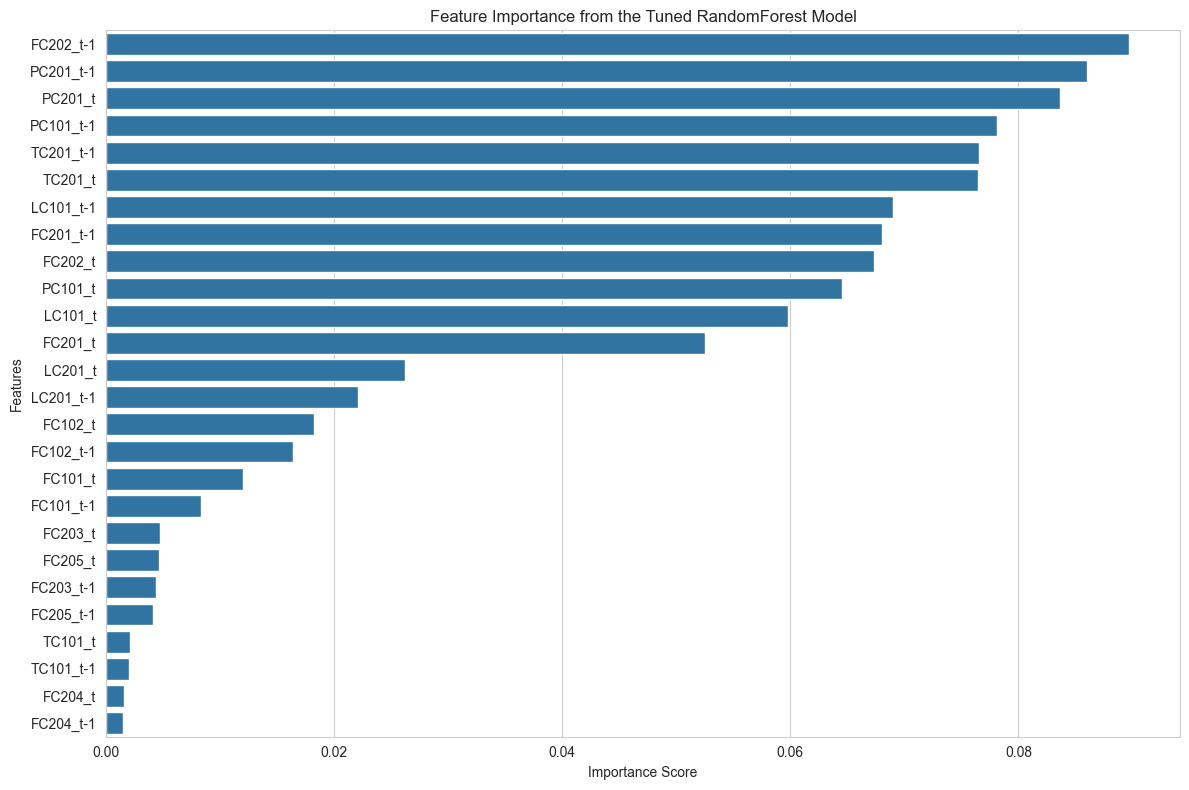

Top 10 Most Important Features:
      Feature  Importance
22  FC202_t-1    0.089678
17  PC201_t-1    0.085990
4     PC201_t    0.083660
14  PC101_t-1    0.078099
18  TC201_t-1    0.076528
5     TC201_t    0.076477
13  LC101_t-1    0.069001
21  FC201_t-1    0.068063
9     FC202_t    0.067357
1     PC101_t    0.064495


In [9]:
# --- Get Feature Importances ---
importances = best_model.feature_importances_
feature_names = X.columns

# Create a dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# --- Plot Feature Importances ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from the Tuned RandomForest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout() # Adjust layout to make room for labels

# Save the plot
plt.savefig('images/feature_importance.png', dpi=300)
plt.show()

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

### Save the Final Model

In [10]:
import joblib
import os

# --- Create a directory for the model if it doesn't exist ---
if not os.path.exists('model'):
    os.makedirs('model')
    print("Created 'model' directory.")

# --- Save the best model to a file ---
model_filename = 'model/final_fault_detection_model.joblib'
joblib.dump(best_model, model_filename)

print(f"\nFinal model saved successfully to: {model_filename}")

# You can also save the columns the model was trained on, which is good practice
model_columns = list(X.columns)
joblib.dump(model_columns, 'model/model_columns.joblib')
print("Model columns saved successfully.")


Created 'model' directory.

Final model saved successfully to: model/final_fault_detection_model.joblib
Model columns saved successfully.


Loading the saved model and columns...
Model loaded successfully.

Loading and preparing the test data...
Test data loaded and cleaned successfully.

Making predictions on the test set...

--- Final Model Performance on Unseen Test Data ---

Test Set Accuracy: 92.58%

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     14657
           1       0.90      0.85      0.87      2742
           2       0.99      0.71      0.83      2659
           3       0.95      0.93      0.94       663
           4       0.97      1.00      0.98       470
           5       1.00      0.99      0.99       719
           6       1.00      0.87      0.93       615

    accuracy                           0.93     22525
   macro avg       0.96      0.90      0.93     22525
weighted avg       0.93      0.93      0.92     22525


Generating confusion matrix...


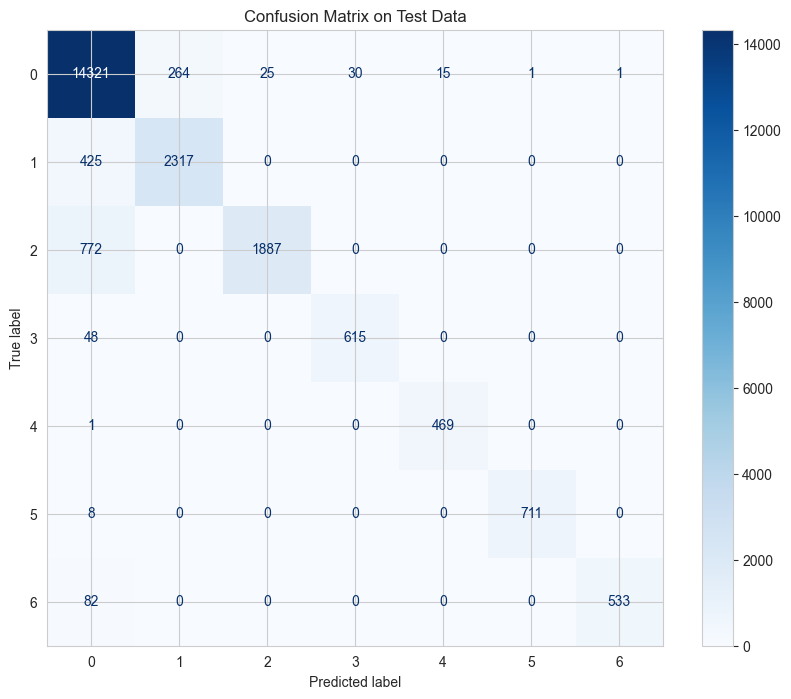

In [11]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- 1. Load the Saved Model and Columns ---
print("Loading the saved model and columns...")
try:
    final_model = joblib.load('model/final_fault_detection_model.joblib')
    model_columns = joblib.load('model/model_columns.joblib')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: Model files not found. Please make sure you have run the previous cells.")
    final_model = None

if final_model:
    # --- 2. Load and Prepare the Test Data ---
    print("\nLoading and preparing the test data...")
    try:
        test_df = pd.read_csv(
            'data/SWTU_FDD_standardized_test_data.txt',
            sep='\s+',
            header=None,
            names=final_columns,
            skiprows=1
        )
        
        # Correct data types for test set
        for col in test_df.columns[:-1]:
            test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
        test_df['Class'] = test_df['Class'].astype(int)
        
        print("Test data loaded and cleaned successfully.")

        # Separate features and target
        X_test = test_df.drop('Class', axis=1)
        y_test = test_df['Class']

        # --- 3. Make Predictions on the Test Set ---
        print("\nMaking predictions on the test set...")
        y_pred_test = final_model.predict(X_test)

        # --- 4. Evaluate Performance ---
        print("\n--- Final Model Performance on Unseen Test Data ---")
        print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
        
        print("\nTest Set Classification Report:")
        print(classification_report(y_test, y_pred_test))

        # --- 5. Generate and Save Confusion Matrix ---
        print("\nGenerating confusion matrix...")
        cm = confusion_matrix(y_test, y_pred_test)
        
        # Plot the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=ax, cmap='Blues')
        
        plt.title('Confusion Matrix on Test Data')
        plt.savefig('images/confusion_matrix.png', dpi=300)
        plt.show()

    except FileNotFoundError:
        print("Error: The file 'data/SWTU_FDD_standardized_test_data.txt' was not found.")
